# House prices analysis using Linear Regression
Author: Gan-Od Bayarbaatar

In this kernel, we will predict house prices from a collection of 2930 houses in Ames, Iowa, each with 80 (23 nominal, 23 ordinal, 14 discrete, and 20 continuous) features such as 'number of bathrooms above ground', and 'size of front lawn'.  

The Ames dataset is a modern expansion on the famous Boston Housing dataset. Its extensive data and numerous features require a robust feature engineering and provides great practice for data scientists to hone their machine learning skills.

The kernel comprises of the following sections:
- Get Data
- Data Cleaning
- Data Preprocessing
- Data Modeling

I will provide explanations for each section for its importance in this Linear Regression model, in the hopes  it will be comprehensible to beginners as well as experts.  
I have found the following kernels to be incredibly useful and readable, and I encourage you to go check them out:

- Comprehensive data exploration with Python by Pedro Marcelino:  
https://www.kaggle.com/pmarcelino/comprehensive-data-exploration-with-python#Out-liars

- A study on Regression applied to the Ames dataset by Julien Cohen-Solal:  
https://www.kaggle.com/juliencs/a-study-on-regression-applied-to-the-ames-dataset

- Regularized Linear Models by Alexandru Papiu:  
https://www.kaggle.com/apapiu/regularized-linear-models

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv
/kaggle/input/house-prices-advanced-regression-techniques/train.csv


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from scipy import stats
from scipy.stats import norm, skew 
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.float_format', lambda x: '%.3f' % x)
%matplotlib inline


# Get Data
Save training and testing dataset into two separate Pandas DataFrames, then combining them into one for future data cleaning and preprocessing.

In [3]:
train = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/train.csv")
test = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/test.csv")

In [4]:
whole_df = pd.concat([train, test])

In [5]:
whole_df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.000,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.000
1,2,20,RL,80.000,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.000
2,3,60,RL,68.000,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.000
3,4,70,RL,60.000,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.000
4,5,60,RL,84.000,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.000,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,nan
1455,2916,160,RM,21.000,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml,nan
1456,2917,20,RL,160.000,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml,nan
1457,2918,85,RL,62.000,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,nan


# Data Cleaning

In the data cleaning section, we will be:
- Handling Missing Values

Replace a NaN value with the appropriate replacement value - either mean or median or simply "None" depending on the significance and meaning it holds for the particular column
- Feature Engineering

Convert categorical values into numerical values using LabelEncoder on Nominal features and OrdinalEncoder on Ordinal features.

In [6]:
# Saving ID columns of train and test for the RMSE test
train_salePrice = train.loc[:, 'SalePrice']
train_ID = train.loc[:, 'Id']
test_ID = test.loc[:, 'Id']

In [7]:
train['SalePrice']

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

In [8]:
whole_df.set_index('Id', drop = True, inplace = True)

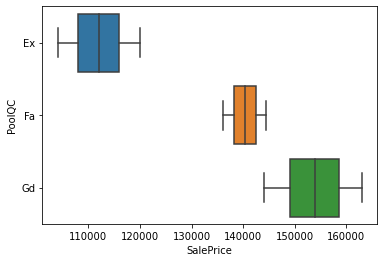

In [9]:
sns.boxplot(x = train_salePrice, y = whole_df.loc[train_ID, 'PoolQC'])

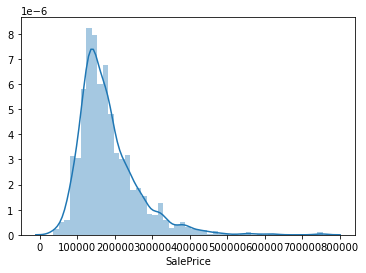

In [10]:
sns.distplot(train['SalePrice'])

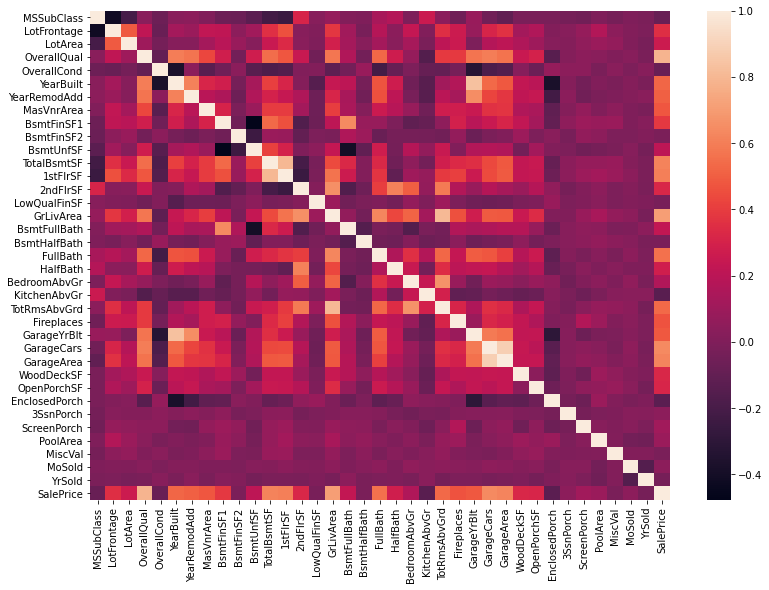

In [11]:
plt.subplots(figsize = (13,9))
sns.heatmap(whole_df.corr())

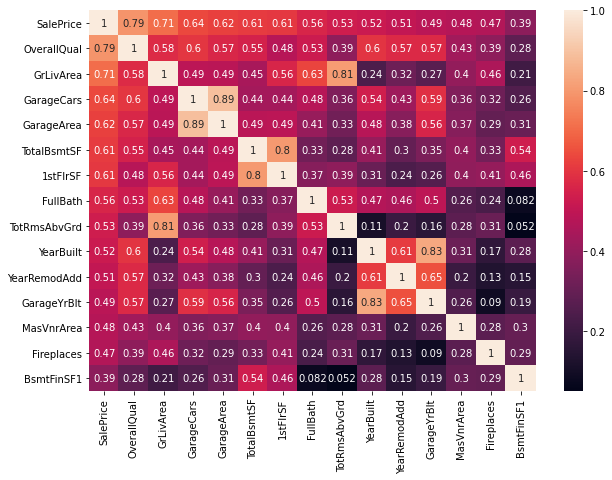

In [12]:
plt.subplots(figsize = (10,7))
corrmatrix = whole_df.corr()
cols = corrmatrix.nlargest(15,'SalePrice').index
#cm = np.corrcoef(train[cols].values.T)
top_cols_df = whole_df.loc[:,cols]
sns.heatmap(top_cols_df.corr(), annot = True)

Eliminating highly correlated columns

In [13]:
whole_df.drop(['GarageArea', '1stFlrSF', 'TotRmsAbvGrd', 'GarageYrBlt', 'Utilities','MiscVal'], axis = 1, inplace = True)

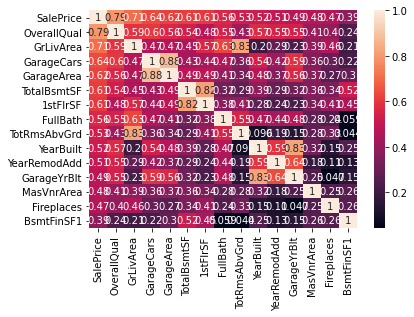

In [14]:
corrmatrix = train.corr()
columns = corrmatrix.nlargest(15,'SalePrice').index
top_cols_df = train.loc[:,columns]
sns.heatmap(top_cols_df.corr(), annot = True)

### Handling Missing Values

In [15]:
total = whole_df.isnull().sum().sort_values(ascending = False)
percent = (whole_df.isnull().sum()/whole_df.isnull().count()).sort_values()
missing = pd.concat([total, percent], axis =1, keys = ['Total', 'Percent'])
print('Total Missing Values')
miss_cols = missing.iloc[:20].index
missing.iloc[:20]


Total Missing Values


,Total,Percent
PoolQC,2909,0.997
MiscFeature,2814,0.964
Alley,2721,0.932
Fence,2348,0.804
SalePrice,1459,0.500
FireplaceQu,1420,0.486
LotFrontage,486,0.166
GarageFinish,159,0.054
GarageQual,159,0.054
GarageCond,159,0.054


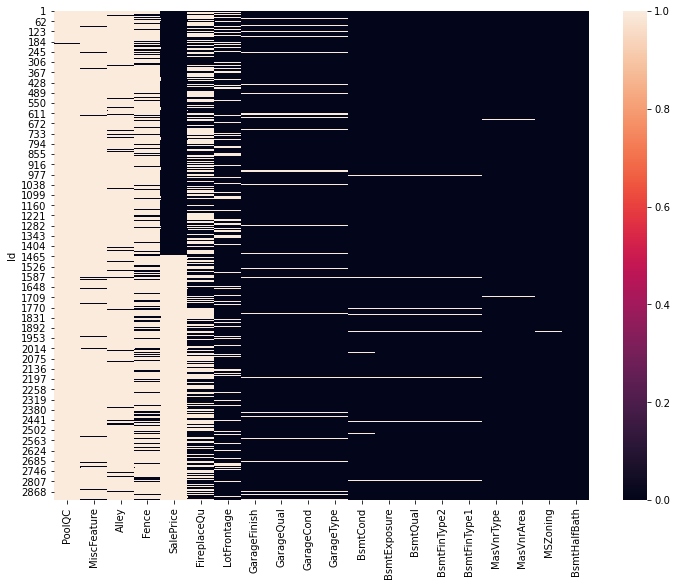

In [16]:
plt.subplots(figsize = (12,9))
sns.heatmap(whole_df[miss_cols].isnull())

In [17]:
whole_df['BsmtQual'].unique()

array(['Gd', 'TA', 'Ex', nan, 'Fa'], dtype=object)

In [18]:
# Handle missing values for features where median/mean or most common value doesn't make sense

# Alley : data description says NA means "no alley access"
whole_df.loc[:, "Alley"] = whole_df.loc[:, "Alley"].fillna("None")

# BedroomAbvGr : NA most likely means 0
whole_df.loc[:, "BedroomAbvGr"] = whole_df.loc[:, "BedroomAbvGr"].fillna(0)

# BsmtQual etc : data description says NA for basement features is "no basement"
whole_df.loc[:, "BsmtQual"] = whole_df.loc[:, "BsmtQual"].fillna("None")
whole_df.loc[:, "BsmtCond"] = whole_df.loc[:, "BsmtCond"].fillna("None")
whole_df.loc[:, "BsmtExposure"] = whole_df.loc[:, "BsmtExposure"].fillna("None")
whole_df.loc[:, "BsmtFinType1"] = whole_df.loc[:, "BsmtFinType1"].fillna("None")
whole_df.loc[:, "BsmtFinType2"] = whole_df.loc[:, "BsmtFinType2"].fillna("None")
whole_df.loc[:, "BsmtFullBath"] = whole_df.loc[:, "BsmtFullBath"].fillna(0)
whole_df.loc[:, "BsmtHalfBath"] = whole_df.loc[:, "BsmtHalfBath"].fillna(0)
whole_df.loc[:, "BsmtUnfSF"] = whole_df.loc[:, "BsmtUnfSF"].fillna(0)

# CentralAir : NA most likely means No
whole_df.loc[:, "CentralAir"] = whole_df.loc[:, "CentralAir"].fillna("N")

# Condition : NA most likely means Normal
whole_df.loc[:, "Condition1"] = whole_df.loc[:, "Condition1"].fillna("Norm")
whole_df.loc[:, "Condition2"] = whole_df.loc[:, "Condition2"].fillna("Norm")

# EnclosedPorch : NA most likely means no enclosed porch
whole_df.loc[:, "EnclosedPorch"] = whole_df.loc[:, "EnclosedPorch"].fillna(0)

# External stuff : NA most likely means average
whole_df.loc[:, "ExterCond"] = whole_df.loc[:, "ExterCond"].fillna("TA")
whole_df.loc[:, "ExterQual"] = whole_df.loc[:, "ExterQual"].fillna("TA")

# Fence : data description says NA means "no fence"
whole_df.loc[:, "Fence"] = whole_df.loc[:, "Fence"].fillna("None")

# FireplaceQu : data description says NA means "no fireplace"
whole_df.loc[:, "FireplaceQu"] = whole_df.loc[:, "FireplaceQu"].fillna("None")
whole_df.loc[:, "Fireplaces"] = whole_df.loc[:, "Fireplaces"].fillna(0)

# Functional : data description says NA means typical
whole_df.loc[:, "Functional"] = whole_df.loc[:, "Functional"].fillna("Typ")

# GarageType etc : data description says NA for garage features is "no garage"
whole_df.loc[:, "GarageType"] = whole_df.loc[:, "GarageType"].fillna("None")
whole_df.loc[:, "GarageFinish"] = whole_df.loc[:, "GarageFinish"].fillna("None")
whole_df.loc[:, "GarageQual"] = whole_df.loc[:, "GarageQual"].fillna("None")
whole_df.loc[:, "GarageCond"] = whole_df.loc[:, "GarageCond"].fillna("None")
whole_df.loc[:, "GarageCars"] = whole_df.loc[:, "GarageCars"].fillna(0)

# HalfBath : NA most likely means no half baths above grade
whole_df.loc[:, "HalfBath"] = whole_df.loc[:, "HalfBath"].fillna(0)

# HeatingQC : NA most likely means typical
whole_df.loc[:, "HeatingQC"] = whole_df.loc[:, "HeatingQC"].fillna("TA")

# KitchenAbvGr : NA most likely means 0
whole_df.loc[:, "KitchenAbvGr"] = whole_df.loc[:, "KitchenAbvGr"].fillna(0)

# KitchenQual : NA most likely means typical
whole_df.loc[:, "KitchenQual"] = whole_df.loc[:, "KitchenQual"].fillna("TA")

# LotFrontage : NA most likely means no lot frontage
whole_df.loc[:, "LotFrontage"] = whole_df.loc[:, "LotFrontage"].fillna(0)

# LotShape : NA most likely means regular
whole_df.loc[:, "LotShape"] = whole_df.loc[:, "LotShape"].fillna("Reg")

# MasVnrType : NA most likely means no veneer
whole_df.loc[:, "MasVnrType"] = whole_df.loc[:, "MasVnrType"].fillna("None")
whole_df.loc[:, "MasVnrArea"] = whole_df.loc[:, "MasVnrArea"].fillna(0)

# MiscFeature : data description says NA means "no misc feature"
whole_df.loc[:, "MiscFeature"] = whole_df.loc[:, "MiscFeature"].fillna("None")

# MSZoning : NA replaced with the most frequently occuring value 'RL'
whole_df.loc[:, "MSZoning"] = whole_df.loc[:, "MSZoning"].fillna(whole_df.loc[:, "MSZoning"].mode()[0])

# OpenPorchSF : NA most likely means no open porch
whole_df.loc[:, "OpenPorchSF"] = whole_df.loc[:, "OpenPorchSF"].fillna(0)

# PavedDrive : NA most likely means not paved
whole_df.loc[:, "PavedDrive"] = whole_df.loc[:, "PavedDrive"].fillna("N")

# PoolQC : data description says NA means "no pool"
whole_df.loc[:, "PoolQC"] = whole_df.loc[:, "PoolQC"].fillna("None")
whole_df.loc[:, "PoolArea"] = whole_df.loc[:, "PoolArea"].fillna(0)

# SaleCondition : NA most likely means normal sale
whole_df.loc[:, "SaleCondition"] = whole_df.loc[:, "SaleCondition"].fillna("Normal")

# ScreenPorch : NA most likely means no screen porch
whole_df.loc[:, "ScreenPorch"] = whole_df.loc[:, "ScreenPorch"].fillna(0)

# WoodDeckSF : NA most likely means no wood deck
whole_df.loc[:, "WoodDeckSF"] = whole_df.loc[:, "WoodDeckSF"].fillna(0)

In [19]:
whole_df.drop('SalePrice', axis = 1, inplace = True)

In [20]:
total = whole_df.isnull().sum().sort_values(ascending = False)
percent = (whole_df.isnull().sum()/whole_df.isnull().count()).sort_values()
missing = pd.concat([total, percent], axis = 1, keys = ['Total', 'Percent'])
print('Total Missing Values')
miss_cols = missing.iloc[:20].index
missing.iloc[:20]

Total Missing Values


,Total,Percent
TotalBsmtSF,1,0.000
BsmtFinSF2,1,0.000
BsmtFinSF1,1,0.000
Electrical,1,0.000
Exterior2nd,1,0.000
Exterior1st,1,0.000
SaleType,1,0.000
LotShape,0,0.000
LandContour,0,0.000
BsmtFinType2,0,0.000


In [21]:
for i in miss_cols[:7]:
    whole_df.loc[:, i] = whole_df.loc[:, i].fillna(whole_df.loc[:, i].mode()[0]) 

In [22]:
total = whole_df.isnull().sum().sort_values(ascending = False)
percent = (whole_df.isnull().sum()/whole_df.isnull().count()).sort_values()
missing = pd.concat([total, percent], axis = 1, keys = ['Total', 'Percent'])
print('Total Missing Values')
missing.iloc[:20]


Total Missing Values


,Total,Percent
SaleCondition,0,0.000
BsmtUnfSF,0,0.000
RoofStyle,0,0.000
RoofMatl,0,0.000
Exterior1st,0,0.000
Exterior2nd,0,0.000
MasVnrType,0,0.000
MasVnrArea,0,0.000
ExterQual,0,0.000
ExterCond,0,0.000


In [23]:
# Checking if there is any null values left in the data set
whole_df.isnull().values.any()

False

### Feature Engineering

First, we will be converting some of the **ordinal categorical features** into numerical values with OrdinalEncoder from the Sci-kit Learn package.

This should be done separately from the **nominal (non-ordinal) categorical features** because the orders of values in these columns matter, while in columns with nominal values, the value ordering does not provide any more information.

In [24]:
# Taking the Ordinal Features in one list
ord_fields = ['MSSubClass','ExterQual','LotShape','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1',
            'BsmtFinType2','HeatingQC','Functional','FireplaceQu','KitchenQual', 'GarageFinish',
            'GarageQual','GarageCond','PoolQC','Fence']

# Ordering values of each column in 'ord_fields'
orders = [ 
    #MSSubClass 
    ['20','30','40','45','50','60','70','75','80','85', '90','120','150','160','180','190'],
    #ExterQual 
    ['Fa','TA','Gd','Ex'],
    #LotShape 
    ['Reg','IR1' ,'IR2','IR3'], 
    #BsmtQual 
    ['None','Fa','TA','Gd','Ex'],
    #BsmtCond
    ['None','Po','Fa','TA','Gd','Ex'],
    #BsmtExposure 
    ['None','No','Mn','Av','Gd'],
    #BsmtFinType1 
    ['None','Unf','LwQ', 'Rec','BLQ','ALQ' , 'GLQ' ],
    #BsmtFinType2 
    ['None','Unf','LwQ', 'Rec','BLQ','ALQ' , 'GLQ' ],
    #HeatingQC 
    ['Po','Fa','TA','Gd','Ex'], 
    #Functional 
    ['Sev','Maj2','Maj1','Mod','Min2','Min1','Typ'], 
    #FireplaceQu 
    ['None','Po','Fa','TA','Gd','Ex'], 
    #KitchenQual 
    ['Fa','TA','Gd','Ex'],
    #GarageFinish 
    ['None','Unf','RFn','Fin'],
    #GarageQual 
    ['None','Po','Fa','TA','Gd','Ex'],
    #GarageCond
    ['None','Po','Fa','TA','Gd','Ex'],
    #PoolQC
    ['None','Fa','Gd','Ex'], 
    #Fence
    ['None','MnWw','GdWo','MnPrv','GdPrv']]

# Using 'OrdinalEncoder' from the sklearn preprocessing package to convert from Categorical to

from sklearn.preprocessing import OrdinalEncoder
for i in range(len(orders)): 
    ord_en = OrdinalEncoder(categories = {0 : orders[i]}) 
    whole_df.loc[:, ord_fields[i]] = ord_en.fit_transform(whole_df.loc[:, ord_fields[i]].values.reshape(-1,1))

Dividing the **'whole_df'** dataframe into two separate **numerical** and **categorical** feature dataframes

In [25]:
categorical = whole_df.select_dtypes(include = ["object"]).columns
numerical = whole_df.select_dtypes(exclude = ["object"]).columns

print("Numerical features : " + str(len(numerical)))
print("Categorical features : " + str(len(categorical)))
num_df = whole_df[numerical]
cat_df = whole_df[categorical]

Numerical features : 47
Categorical features : 26


In [26]:
# Number of unique values in the Categorical features DataFrame 'cat_df' per column
cat_df.nunique()

MSZoning          5
Street            2
Alley             3
LandContour       4
LotConfig         5
LandSlope         3
Neighborhood     25
Condition1        9
Condition2        8
BldgType          5
HouseStyle        8
RoofStyle         6
RoofMatl          8
Exterior1st      15
Exterior2nd      16
MasVnrType        4
ExterCond         5
Foundation        6
Heating           6
CentralAir        2
Electrical        5
GarageType        7
PavedDrive        3
MiscFeature       5
SaleType          9
SaleCondition     6
dtype: int64

Now, we will convert the rest of the categorical features, which should all be nominal, into numerical values using LabelEncoder from the Sklearn Preprocessing package.

In [27]:
cat_cols = cat_df.columns
from sklearn.preprocessing import LabelEncoder
for one in cat_cols:
    lab_enc = LabelEncoder() 
    lab_enc.fit(list(whole_df[one].values)) 
    whole_df[one] = lab_enc.transform(list(whole_df[one].values))

In [28]:
# Checking to see if there are any categorical columns left in 'whole_df'
categorical = whole_df.select_dtypes(include = ["object"]).columns
numerical = whole_df.select_dtypes(exclude = ["object"]).columns

print("Numerical features : " + str(len(numerical)))
print("Categorical features : " + str(len(categorical)))
num_df = whole_df[numerical]
cat_df = whole_df[categorical]

Numerical features : 73
Categorical features : 0


Finally, we have now handled all of our missing values, dealt with our categorical features both ordinal and nominal, and have turned all values numerical.


We proceed on to preparing our data for our selected model: Linear Regression.

# Data preprocessing

Linear Regression is a very useful tool for a data scientist because it is easy to apply to data and comprehend the results.

The integral step for a successful Linear Regression model is to ensure the normality and linearity of the features. We analyze the skewness of our features and linearize using Box Cox Transformation.

We start with the Target variable, the Sale Price column, check its linearity and skewness.

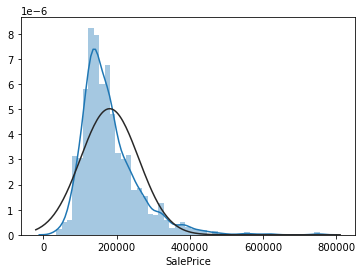

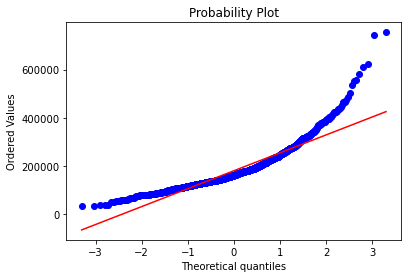

In [29]:
# Creat a histogram and normal probability plot for 'Sale Price'
sns.distplot(train_salePrice, fit = norm)
fig = plt.figure()
res = stats.probplot(train_salePrice, plot = plt)

In [30]:
# Applying the Box-Cox log transformation to the target feature with lambda = 0.15

lam = 0.15
from scipy.special import boxcox1p
train_log_SP = boxcox1p(train_salePrice, lam)

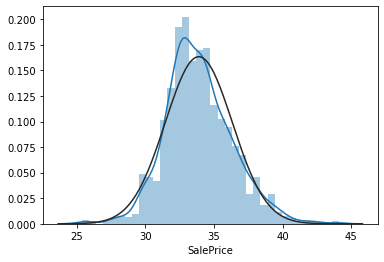

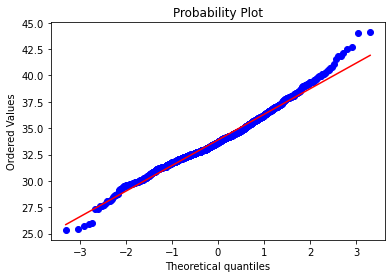

In [31]:
# Plotting the transformed histogram and normal probability plot of 'Sale Price'
sns.distplot(train_log_SP, fit = norm)
fig = plt.figure()
res = stats.probplot(train_log_SP, plot = plt)

### Check Skewness of all parameters
With a transformed 'Sale Price' column, we want to make sure the other important features are linear as well.

In [32]:
# Creating a table of variables and their relative skewness
skewed = whole_df[numerical].apply(lambda x: skew(x)).sort_values(ascending = False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed})
skewness.head(20)


Skew in numerical features: 



,Skew
PoolQC,19.256
PoolArea,16.898
LotArea,12.822
LowQualFinSF,12.089
Heating,12.079
Condition2,12.060
3SsnPorch,11.376
RoofMatl,8.708
MiscFeature,5.064
LandSlope,4.975


In [33]:
# We transform features with skewness larger than 0.75 to ensure the linearity of features.
skewness = skewness[abs(skewness) > 0.75]
print("We will be There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))

from scipy.special import boxcox1p
skewed_features = skewness.index

for feat in skewed_features:
    whole_df[feat] = boxcox1p(whole_df[feat], lam)

We will be There are 73 skewed numerical features to Box Cox transform


# Data Modeling
We are ready to use the Linear Regression method from Sci-Kit Learn on our linearized data.

In [34]:
ntrain = len(train.index)
ntrain

1460

In [35]:
train = whole_df.iloc[ : ntrain]
test = whole_df.iloc[ntrain : ]

y = train_log_SP
X = train

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [38]:
from sklearn.linear_model import LinearRegression

In [39]:
lm = LinearRegression()

In [40]:
lm.fit(X_train, y_train)

LinearRegression()

In [41]:
predictions = lm.predict(X_test)

Text(336.9714285714286, 0.5, 'Predicted Y')

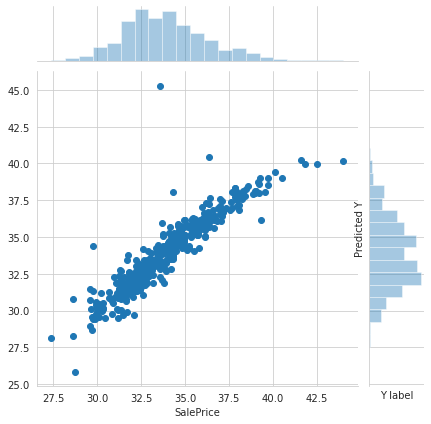

In [42]:
sns.set_style(style = 'whitegrid')
sns.jointplot(x = y_test, y = predictions)
#plt.scatter(y_test, predictions)
plt.xlabel('Y label')
plt.ylabel('Predicted Y')

In [43]:
from sklearn import metrics
print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_test,predictions)))

RMSE:  0.9893574925755968


In [44]:
metrics.explained_variance_score(y_test,predictions)

0.8337807464365913

### Try model on test data
The RMSE score on the trainind data looks promising, so we move on and predict the house prices in our 'test' data set with a Linear Regression model fitted on the whole 'train' data set.

In [45]:
lm_test = LinearRegression()

In [46]:
lm_test.fit(X,y)

LinearRegression()

In [47]:
test_predictions = lm_test.predict(test)

In [48]:
len(test_predictions)

1459

In [49]:
from scipy.special import boxcox1p, inv_boxcox1p
test_predictions = inv_boxcox1p(test_predictions, lam)

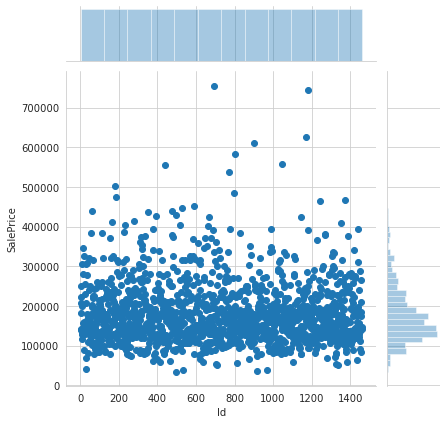

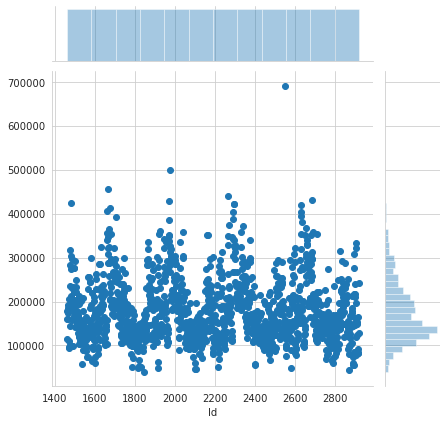

In [50]:
sns.jointplot(x = train_ID, y = train_salePrice)
sns.jointplot(x = test_ID, y = test_predictions)

In [51]:
solution = pd.DataFrame({"id": test_ID, "SalePrice": test_predictions})
solution.to_csv("House_Solutions.csv", index = False)